In [0]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [0]:
#  !pip install tensorflow==2.0.0b1

In [3]:
print(tf.__version__)

2.0.0-beta1


In [0]:
dataset = pd.read_csv("/content/^BSESN.csv",parse_dates=True)

In [0]:
dataset = dataset.bfill(axis=0)

In [0]:
series= dataset['Close'].values

In [0]:
series = series.reshape(-1,1)

In [8]:
series.shape

(5621, 1)

In [0]:
x = MinMaxScaler(feature_range=(-1,1))

In [0]:
series = x.fit_transform(series)

In [0]:
split_time = 5500

# time_train = time[:split_time]
x_train = series[:split_time]
# time_valid = time[split_time:]
x_valid = series[split_time:]

In [0]:
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    # series = tf.expand_dims(series, axis=1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [0]:
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [15]:
train_set

<PrefetchDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>

In [0]:
model = tf.keras.models.Sequential([
                                    

tf.keras.layers.LSTM(20,return_sequences=True),
tf.keras.layers.LSTM(10),
tf.keras.layers.Dense(10),
tf.keras.layers.Dense(1),
])
model.compile(loss='mse', optimizer='rmsprop')

In [17]:
history = model.fit(train_set,epochs=700)

Epoch 1/700
171/171 [==============================] - 10s 56ms/step - loss: 0.0528
Epoch 2/700
171/171 [==============================] - 5s 27ms/step - loss: 0.0015
Epoch 3/700
171/171 [==============================] - 5s 27ms/step - loss: 0.0013
Epoch 4/700
171/171 [==============================] - 5s 27ms/step - loss: 0.0012
Epoch 5/700
171/171 [==============================] - 5s 27ms/step - loss: 0.0011
Epoch 6/700
171/171 [==============================] - 5s 27ms/step - loss: 9.8731e-04
Epoch 7/700
171/171 [==============================] - 5s 28ms/step - loss: 9.3414e-04
Epoch 8/700
171/171 [==============================] - 5s 27ms/step - loss: 8.7714e-04
Epoch 9/700
171/171 [==============================] - 5s 28ms/step - loss: 8.2685e-04
Epoch 10/700
171/171 [==============================] - 5s 28ms/step - loss: 7.8931e-04
Epoch 11/700
171/171 [==============================] - 5s 28ms/step - loss: 7.5177e-04
Epoch 12/700
171/171 [==============================] - 5s 2

In [0]:
 # asdfdgfbg

In [0]:
# model.predict(np.expand_dims(x_valid,axis=-1))

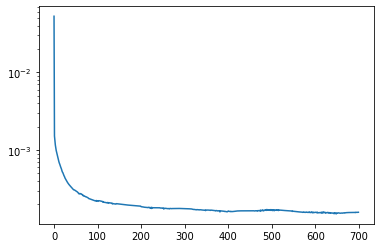

In [20]:
plt.semilogy(history.history['loss'])

In [0]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [0]:
series = np.squeeze(series)
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, 0]

In [0]:
# rnn_forecast

In [24]:
rnn_forecast.shape

(121,)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [0]:
time_valid = []

for time in range(len(x_valid)):
  time_valid.append(time)

In [0]:
# future_time= []

# for f_time in range()

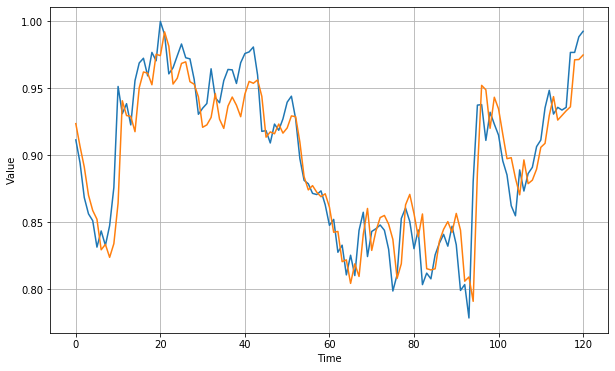

In [29]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)


In [30]:
tf.keras.metrics.mean_squared_error(rnn_forecast,x_valid).numpy().sum()

0.7183776506562367

In [0]:
# model2 = tf.keras.models.Sequential([
                                    

# tf.keras.layers.LSTM(20,return_sequences=True,stateful=True,batch_input_shape = (1,10,1)),
# tf.keras.layers.LSTM(10),
# tf.keras.layers.Dense(10),
# tf.keras.layers.Dense(1),
# ])
# model2.compile(loss='mse', optimizer='rmsprop')

In [0]:
def future_forecast(series,window_size,buffer_size,shuffle_buffer):
  future_values = tf.data.Dataset.from_tensor_slices(series)
  future_values = future_values.window(window_size+1,shift=1,drop_remainder=True)
  future_values = future_values.flat_map(lambda w: w.batch(window_size+1))
  future_values = future_values.shuffle(shuffle_buffer)
  future_values = future_values.map(lambda w:(w[:-1],w[-1]))
  future_values = future_values.batch(buffer_size).prefetch(1)
  return future_values

In [0]:
future = future_forecast(x_valid,30,30,1000)

In [33]:
future

<PrefetchDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>

In [0]:
# # def future(series,window_size,buffer_size,shuffle_buffer):
# future_values = tf.data.Dataset.range(121)
# future_values = future_values.window(10,shift=1,drop_remainder=True)
# future_values = future_values.flat_map(lambda w: w.batch(10))
# # future_values = future_values.shuffle(1000)
# future_values = future_values.map(lambda w:(w[:-1],w[-1]))
# # future_values = future_values.batch(32).prefetch(1)
#   # return future_values

In [0]:
# future(x_valid,10,30,1000)

In [0]:
# for x , y in future_values:
#   print(x.numpy(),y.numpy())
# print()

In [34]:
for train in range(len(x_valid)):
  print("No. of iteration",train)
  model.fit(future,epochs=40)
  # model.reset_states()

No. of iteration 0
Epoch 1/40
4/4 [==============================] - 1s 221ms/step - loss: 0.0015
Epoch 2/40
4/4 [==============================] - 0s 30ms/step - loss: 7.8098e-04
Epoch 3/40
4/4 [==============================] - 0s 30ms/step - loss: 7.0182e-04
Epoch 4/40
4/4 [==============================] - 0s 32ms/step - loss: 7.0593e-04
Epoch 5/40
4/4 [==============================] - 0s 31ms/step - loss: 6.9904e-04
Epoch 6/40
4/4 [==============================] - 0s 32ms/step - loss: 6.8759e-04
Epoch 7/40
4/4 [==============================] - 0s 29ms/step - loss: 6.7660e-04
Epoch 8/40
4/4 [==============================] - 0s 37ms/step - loss: 6.6695e-04
Epoch 9/40
4/4 [==============================] - 0s 35ms/step - loss: 6.5824e-04
Epoch 10/40
4/4 [==============================] - 0s 28ms/step - loss: 6.5019e-04
Epoch 11/40
4/4 [==============================] - 0s 28ms/step - loss: 6.4271e-04
Epoch 12/40
4/4 [==============================] - 0s 31ms/step - loss: 6.3578e-

In [0]:
# def model_forecast(model, series, window_size):
#     ds = tf.data.Dataset.from_tensor_slices(series)
#     ds = ds.window(window_size, shift=1, drop_remainder=True)
#     ds = ds.flat_map(lambda w: w.batch(window_size))
#     ds = ds.batch(32).prefetch(1)
#     forecast = model.predict(ds)
#     return forecast

In [0]:
def future_prediction(model,series,window_size):
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size))
  ds = ds.batch(32).prefetch(1)
  forecast = model.predict(ds)
  return forecast


In [0]:
pred2 = future_prediction(model,x_valid,30)

In [38]:
pred2.shape

(92, 1)

In [0]:
future_time = []
for f_time in range(len(x_valid), (len(x_valid)+len(pred2))):
  # print(f_time)
  future_time.append(f_time)

In [40]:
len(future_time)

92

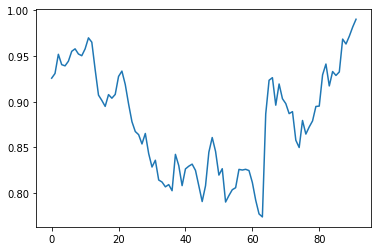

In [41]:
plt.plot(pred2)

In [0]:
# for i in range(121,213):
#   print(i)

In [0]:
# 121+92

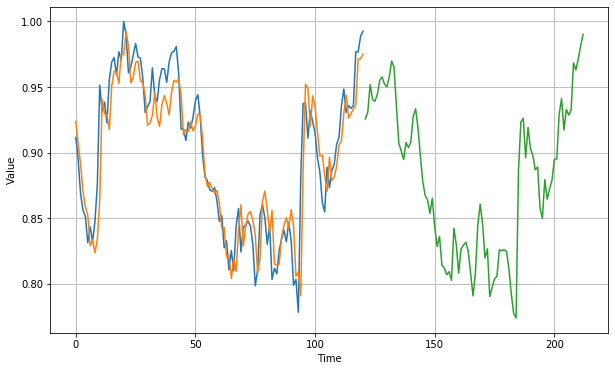

In [42]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
plot_series(future_time,pred2)

